In [26]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from pylab import meshgrid

## 7) Logistic Regression Implementation:   
**a)** Write down a code in Python whose input is a training dataset {(x1, y1), . . . ,(xN , yN )} and its
output is the weight vector w and bias b in the logistic regression model y = σ(w>x + b). The
method must use the gradient descent approach, presented in the class.


In [465]:
class LogitRegression() : 
    def __init__( self, learning_rate, iterations ) :         
        self.learning_rate = learning_rate         
        self.iterations = iterations 
          
    # Function for model training     
    def fit( self, X, Y ) :         
        # no_of_training_examples, no_of_features         
        self.m, self.n = X.shape         
        # weight initialization         
        self.W = np.zeros( self.n )         
        self.b = 0        
        self.X = X         
        self.Y = Y 
          
        # gradient descent learning 
                  
        for i in range( self.iterations ) :             
            self.update_weights()             
        return self
      
    # Helper function to update weights in gradient descent 
      
    def update_weights( self ) :            
        A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) ) 
        #print(A.shape) 
        #A = np.reshape(A,self.m)
        #print(A.shape)
        
        # calculate gradients         
        tmp = ( A - self.Y.T )         
        tmp = np.reshape( tmp, self.m )         
        dW = np.dot( self.X.T, tmp ) / self.m          
        db = np.sum( tmp ) / self.m  
          
        # update weights     
        self.W = self.W - self.learning_rate * dW     
        self.b = self.b - self.learning_rate * db 
          
        return self
      
    # Hypothetical function  h( x )  
      
    def predict( self, X ) :     
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )         
        Y = np.where( Z > 0.5, 1, 0 )         
        return Y 
def plot_reg(X, y, beta0,beta1,beta2,title_label): 
    ''' 
    function to plot decision boundary 
    '''
    # labelled observations 
    x_0 = X[np.where(y == 0.0)[0]] 
    x_1 = X[np.where(y == 1.0)[0]] 
    
    
    # plotting points with diff color for diff label 
    
    plt.scatter([x_1[:, 0]], [x_1[:, 1]], c='r', label='y = 1',alpha = .7) 
    plt.scatter([x_0[:, 0]], [x_0[:, 1]], c='g', label='y = 1') 
      
    # plotting decision boundary 
    x1 = np.arange(-.5, .5, 0.1) 
    x2 = -(beta0 + beta1*x1)/beta2
    plt.plot(x1, x2, c='k', label='reg line') 
    # Labelling
    plt.title(title_label)
    plt.xlabel('x1') 
    plt.ylabel('x2') 
    plt.legend() 
    plt.show()
def getClassificationError(y,y_pred):
    cnt =0
    for i in range (len(y)):
        if y[i] == y_pred[i]:
            cnt += 1
    return (len(y)-cnt)/len(y)

## 7b) 
Download the dataset of the HW02 on the piazza page. The dataset is in Matlab format (.mat);
you can use scipy.io.savemat to convert it to python format (.npy). Run the code on the training
dataset to compute w, b and evaluate on the test dataset. Report the classification error on the
training set and classification error on the test set. Plot the data (use different colors for data in
different classes) and plot the decision boundary found by the logistic regressions.

In [ ]:
mat = scipy.io.loadmat('hw02_dataset.mat')
X_train = np.array(mat['X_trn'])
Y_train = np.array(mat['Y_trn'])
X_test = np.array(mat['X_tst'])
Y_test = np.array(mat['Y_tst'])

In [462]:
# applying the model deined
model = LogitRegression( learning_rate = 0.01, iterations = 1000 ) 
model.fit( X_train, Y_train )     

In [516]:
# Computing w,b from the model
b = model.b
W = model.W
print("Model values of bias, b is    :",b)
print("Model values of Weights, W is :",W)

Model values of bias, b is    : 0.424325990695468
Model values of Weights, W is : [ 1.87118392 -0.40405102]


In [463]:
# predictions for train set
Y_pred_train = model.predict( X_train )
# Classification error 
print("Classification Error on Train Dataset:", 1-accuracy_score(Y_train,Y_pred_train)) 

Classification Error on Train Dataset: 0.031746031746031744


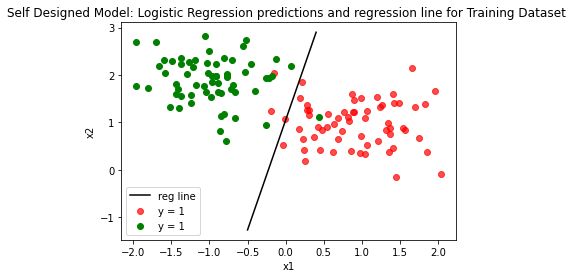

In [468]:
# plotting the data and regression line for test set
X = np.array(mat['X_trn'])
y = np.array(mat['Y_trn'])

plot_reg(X,y, model.b,model.W[0],model.W[1],
         "Self Designed Model: Logistic Regression predictions and regression line for Training Dataset ")

In [431]:
# predictions for test set
Y_pred_test = model.predict( X_test )
# Classification error 
print("Classification Error on Test Dataset:", 1-accuracy_score(Y_test,Y_pred_test)) 

Classification Error on Test Dataset: 0.0714285714285714


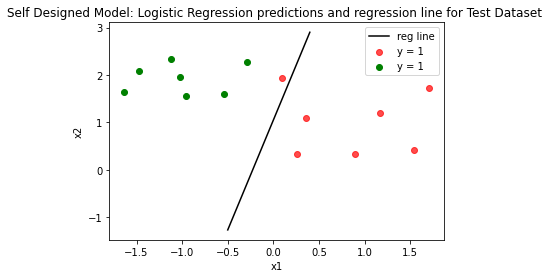

In [470]:
# plotting the data and regression line for test set
X = np.array(mat['X_tst'])
y = np.array(mat['Y_tst'])

plot_reg(X,y, model.b,model.W[0],model.W[1],
         "Self Designed Model: Logistic Regression predictions and regression line for Test Dataset ")

## 8a) Logistic Regression and Naive Bayes: 
For this exercise, use Scikit-Learn in Python.
**a)** Write down a code in Python (that uses logistic regression in Scikit-Learn) whose inputs are a
training dataset and a test dataset and its output is the classification error on the test set. Report the
classification error on the test set of the dataset used in the previous question. Plot the data (use
different colors for data in different classes) and plot the decision boundary found by the logistic
regressions. Compare the results with results of the previous question and justify any discrepancy.


## sklearn-- LogisticRegression

In [471]:
from pandas import Series, DataFrame
import scipy
from scipy.stats import spearmanr
import sklearn
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

from sklearn.metrics import classification_report

In [472]:
# from sklearn 
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)

#print(log_reg.score(X_train,Y_train))

y_pred = log_reg.predict(X_train)

#print (classification_report(Y_train,y_pred))

# Classification error for trainin data set
print("Classification Error on Training Dataset with sklearn :", getClassificationError(Y_train,y_pred))
## TEST
y_pred_test = log_reg.predict(X_test)

#print (classification_report(Y_test,y_pred_test))

# Classification error 
print("Classification Error on Test Dataset with sklearn :", getClassificationError(Y_test,y_pred_test)) 

Classification Error on Training Dataset with sklearn : 0.031746031746031744
Classification Error on Test Dataset with sklearn : 0.07142857142857142


/Users/sapnasharma/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [473]:
# Retrieve the model parameters.
b = log_reg.intercept_[0]
w1, w2 = log_reg.coef_.T

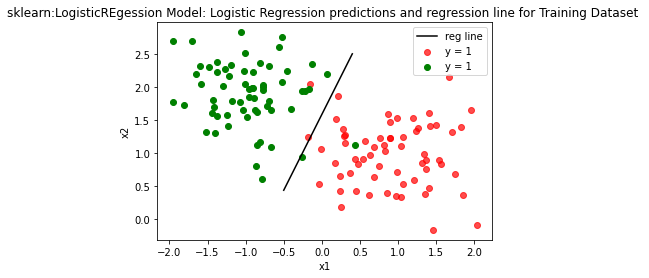

In [474]:
# plotting the data and regression line for test set
X = np.array(mat['X_trn'])
y = np.array(mat['Y_trn'])

plot_reg(X,y, log_reg.intercept_[0],log_reg.coef_.T[0],log_reg.coef_.T[1],
         "sklearn:LogisticREgession Model: Logistic Regression predictions and regression line for Training Dataset ")

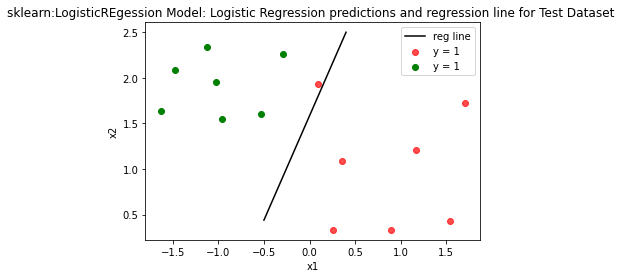

In [476]:
# plotting the data and regression line for test set
X = np.array(mat['X_tst'])
y = np.array(mat['Y_tst'])

plot_reg(X,y, log_reg.intercept_[0],log_reg.coef_.T[0],log_reg.coef_.T[1],
        "sklearn:LogisticREgession Model: Logistic Regression predictions and regression line for Test Dataset ")

## Observation :

|                             | Training set           | TestSet               |
|-----------------------------|------------------------|-----------------------|
|Self Model                   | 0.031746031746031744   | 0.07142857142857142   |
|sklearn: LogisticRegression  | 0.031746031746031744   | 0.07142857142857142   |


### We see that both the models are giving same classification errors on both training and test datasets This might be because both generating the exact same numbers of samples with wrong classification and our datasetis small.



## 8 b) 
Repeat part a by using Naive Bayes from Scikit-Learn.

## Naive Bayes

In [480]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [481]:
X_train = pd.DataFrame(mat['X_trn'])
Y_train = pd.DataFrame(mat['Y_trn'])
X_test = pd.DataFrame(mat['X_tst'])
Y_test = pd.DataFrame(mat['Y_tst'])
x_train,x_test,y_train,y_test = train_test_split(X_train, Y_train,test_size = 0.25, random_state = 40)
model_NB = GaussianNB()
model_NB.fit(x_train , y_train)
y_pred_train = model_NB.predict(x_train)
# Classification error 
print("Classification Error on Training Dataset with Nsive Bayes :", 1-accuracy_score(y_train,y_pred_train)) 
y_pred_test = model_NB.predict(X_test)
# Classification error 
print("Classification Error on Test     Dataset with Nsive Bayes :", 1-accuracy_score(Y_test,y_pred_test)) 

Classification Error on Training Dataset with Nsive Bayes : 0.03191489361702127
Classification Error on Test     Dataset with Nsive Bayes : 0.0714285714285714


/Users/sapnasharma/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


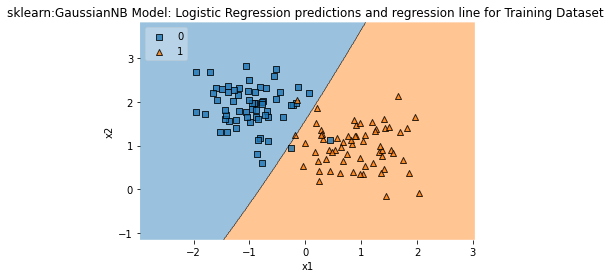

In [514]:
import mlxtend
from mlxtend.plotting import plot_decision_regions
X_train = np.array(mat['X_trn'])
Y_train = np.array(mat['Y_trn'])
y1 = np.reshape(Y_train,  Y_train.shape[0])

plot_decision_regions(X=X_train, y=y1, clf=model_NB, legend=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("sklearn:GaussianNB Model: Logistic Regression predictions and regression line for Training Dataset ")
plt.show()

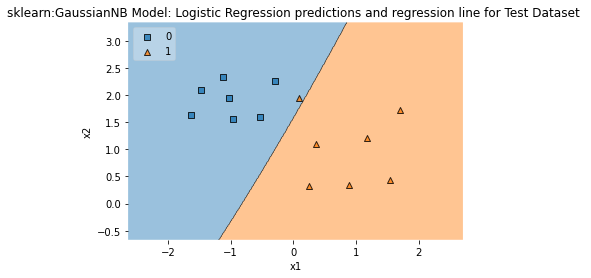

In [515]:
X_test = np.array(mat['X_tst'])
Y_test = np.array(mat['Y_tst'])
y1 = np.reshape(Y_test, Y_test.shape[0])
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=X_test, y=y1, clf=model_NB, legend=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("sklearn:GaussianNB Model: Logistic Regression predictions and regression line for Test Dataset ")
plt.show()

## Comparision of results and Observations :

|                             | Training set           | TestSet               |
|-----------------------------|------------------------|-----------------------|
|Self Model                   | 0.031746031746031744   | 0.07142857142857142   |
|sklearn: LogisticRegression  | 0.031746031746031744   | 0.07142857142857142   |
|Naive Bayes                  | 0.03191489361702127    | 0.0714285714285714    |

### We observe that all the three have same Classification errors on the test data , 
### while the Naive Bayes has a higher error on the training set as comapared to others .
